# Hand Gesture Recognition using Deep Learning

## 1.Data Collection

### Import Libraries

In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

### Create the directory structure

In [2]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_FINE")
    os.makedirs("data/train/02_WATER")
    os.makedirs("data/train/03_ENOUGH")
    os.makedirs("data/train/04_LIGHT-OFF")
    os.makedirs("data/train/05_LIGHT-ON")
    os.makedirs("data/train/06_FAN-OFF")
    os.makedirs("data/train/07_FAN-ON")
    os.makedirs("data/train/08_RESTROOM")
    os.makedirs("data/train/09_STOP")
    os.makedirs("data/train/10_THANK-YOU")
    os.makedirs("data/train/11_HELP")
    os.makedirs("data/train/12_NO-GESTURES")
   
    os.makedirs("data/test")
    os.makedirs("data/test/01_FINE")
    os.makedirs("data/test/02_WATER")
    os.makedirs("data/test/03_ENOUGH")
    os.makedirs("data/test/04_LIGHT-OFF")
    os.makedirs("data/test/05_LIGHT-ON")
    os.makedirs("data/test/06_FAN-OFF")
    os.makedirs("data/test/07_FAN-ON")
    os.makedirs("data/test/08_RESTROOM")
    os.makedirs("data/test/09_STOP")
    os.makedirs("data/test/10_THANK-YOU")
    os.makedirs("data/test/11_HELP")
    os.makedirs("data/test/12_NO-GESTURES")
    

In [3]:
os.listdir('data')

['test', 'train']

In [4]:
os.listdir('data/train')

['01_FINE',
 '02_WATER',
 '03_ENOUGH',
 '04_LIGHT-OFF',
 '05_LIGHT-ON',
 '06_FAN-OFF',
 '07_FAN-ON',
 '08_RESTROOM',
 '09_STOP',
 '10_THANK-YOU',
 '11_HELP',
 '12_NO-GESTURES']

In [5]:
os.listdir('data/test')

['01_FINE',
 '02_WATER',
 '03_ENOUGH',
 '04_LIGHT-OFF',
 '05_LIGHT-ON',
 '06_FAN-OFF',
 '07_FAN-ON',
 '08_RESTROOM',
 '09_STOP',
 '10_THANK-YOU',
 '11_HELP',
 '12_NO-GESTURES']

### Enter Mode - Train or Test

In [10]:
print('Enter mode:')
mode = input()
mode

Enter mode:


'train'

In [11]:
if mode == 'train':   
    directory = 'data/'+mode+'/'
else:
    directory = 'data/'+mode+'/'

### Capture images for Dataset

In [12]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)

# Getting count of existing images
    count = {
        'FINE': len(os.listdir(directory + "/01_FINE")),
        'WATER': len(os.listdir(directory + "/02_WATER")),
        'ENOUGH': len(os.listdir(directory + "/03_ENOUGH")),
        'LIGHT-OFF': len(os.listdir(directory + "/04_LIGHT-OFF")),
        'LIGHT-ON': len(os.listdir(directory + "/05_LIGHT-ON")),
        'FAN-OFF': len(os.listdir(directory + "/06_FAN-OFF")),
        'FAN-ON': len(os.listdir(directory + "/07_FAN-ON")),
        'RESTROOM': len(os.listdir(directory + "/08_RESTROOM")),
        'STOP': len(os.listdir(directory + "/09_STOP")),
        'THANK-YOU': len(os.listdir(directory + "/10_THANK-YOU")),
        'HELP': len(os.listdir(directory + "/11_HELP")),
        'NO-GESTURES':len(os.listdir(directory + "/12_NO-GESTURES"))
    }

    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE: "+mode, (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "IMAGE COUNT:", (10, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "FINE (1): " + str(count['FINE']), (10, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "WATER (2): " + str(count['WATER']), (10, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "ENOUGH (3): " + str(count['ENOUGH']), (10, 250), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "LIGHT-OFF (4): " + str(count['LIGHT-OFF']), (10, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "LIGHT-ON (5): " + str(count['LIGHT-ON']), (10, 350), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "FAN-OFF (6): " + str(count['FAN-OFF']), (10, 400), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "FAN-ON (7): " + str(count['FAN-ON']), (10, 450), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "RESTROOM (8): " + str(count['RESTROOM']), (10, 500), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "STOP (9): " + str(count['STOP']), (10, 550), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "THANK-YOU (10): " + str(count['THANK-YOU']), (10, 600), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "HELP (11): " + str(count['HELP']), (10, 650), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))

    cv2.imshow("Collecting data", frame)

    # do the processing after capturing the image!
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)

    interrupt = cv2.waitKey(10)
    
    if interrupt & 0xFF == 27:  # ESC key
        break
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory + '01_FINE/' + str(count['FINE']) + '.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory + '02_WATER/' + str(count['WATER']) + '.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory + '03_ENOUGH/' + str(count['ENOUGH']) + '.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory + '04_LIGHT-OFF/' + str(count['LIGHT-OFF']) + '.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv2.imwrite(directory + '05_LIGHT-ON/' + str(count['LIGHT-ON']) + '.jpg', roi)
    if interrupt & 0xFF == ord('6'):
        cv2.imwrite(directory + '06_FAN-OFF/' + str(count['FAN-OFF']) + '.jpg', roi)
    if interrupt & 0xFF == ord('7'):
        cv2.imwrite(directory + '07_FAN-ON/' + str(count['FAN-ON']) + '.jpg', roi)
    if interrupt & 0xFF == ord('8'):
        cv2.imwrite(directory + '08_RESTROOM/' + str(count['RESTROOM']) + '.jpg', roi)
    if interrupt & 0xFF == ord('9'):
        cv2.imwrite(directory + '09_STOP/' + str(count['STOP']) + '.jpg', roi)
    if interrupt & 0xFF == ord('t'):  
        cv2.imwrite(directory + '10_THANK-YOU/' + str(count['THANK-YOU']) + '.jpg', roi)
    if interrupt & 0xFF == ord('h'): 
        cv2.imwrite(directory + '11_HELP/' + str(count['HELP']) + '.jpg', roi)
    if interrupt & 0xFF == ord('n'): 
        cv2.imwrite(directory + '12_NO-GESTURES/' + str(count['NO-GESTURES']) + '.jpg', roi)



cap.release()
cv2.destroyAllWindows()

### Gestures in Dataset

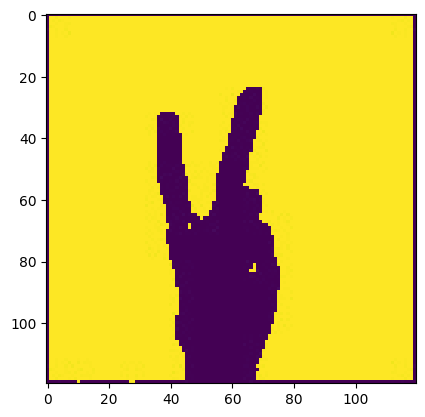

In [13]:
img = Image.open('data\\train\\01_FINE\\0.jpg')
plt.imshow(img)

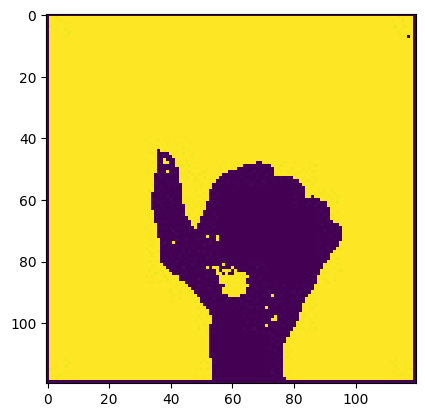

In [14]:
img = Image.open('data\\train\\02_WATER\\0.jpg')
plt.imshow(img)

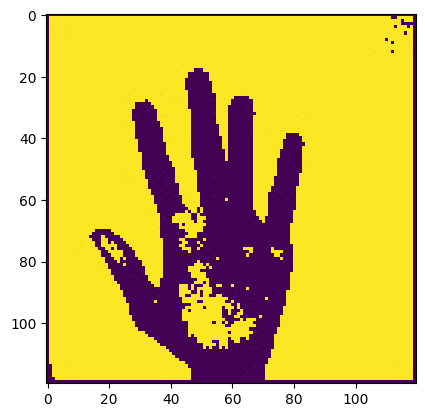

In [15]:
img = Image.open('data\\train\\03_ENOUGH\\4.jpg')
plt.imshow(img)

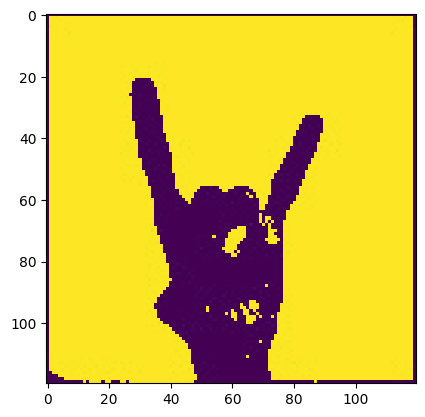

In [16]:
img = Image.open('data\\train\\04_LIGHT-OFF\\15.jpg')
plt.imshow(img)

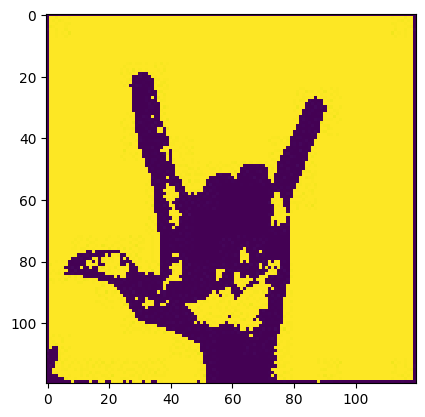

In [17]:
img = Image.open('data\\train\\05_LIGHT-ON\\15.jpg')
plt.imshow(img)

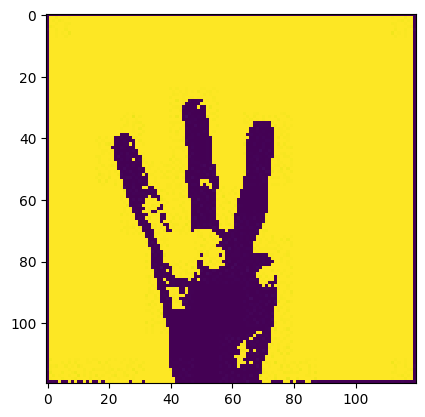

In [18]:
img = Image.open('data\\train\\06_FAN-OFF\\7.jpg')
plt.imshow(img)

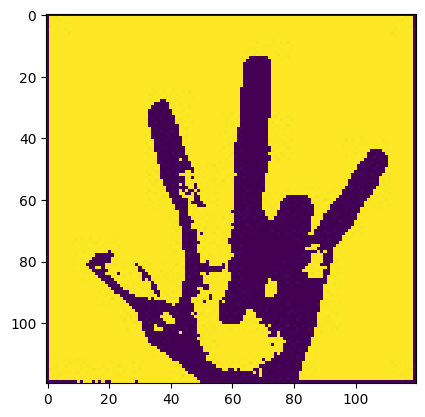

In [19]:
img = Image.open('data\\train\\07_FAN-ON\\15.jpg')
plt.imshow(img)

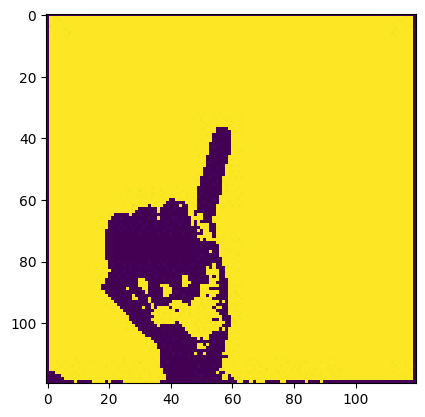

In [20]:
img = Image.open('data\\train\\08_RESTROOM\\0.jpg')
plt.imshow(img)

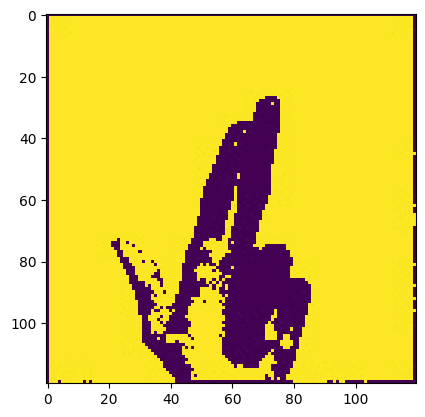

In [21]:
img = Image.open('data\\train\\09_STOP\\0.jpg')
plt.imshow(img)

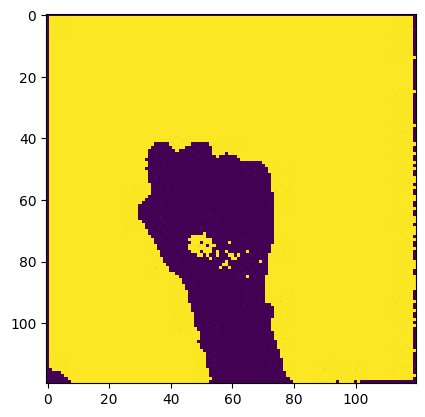

In [22]:
img = Image.open('data\\train\\10_THANK-YOU\\0.jpg')
plt.imshow(img)

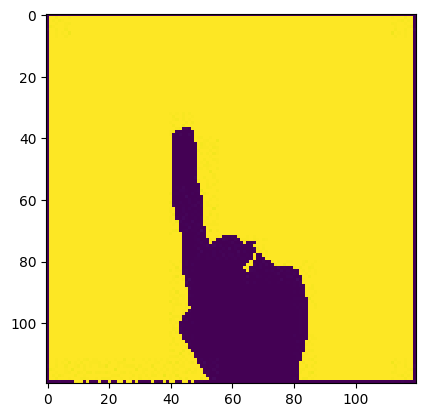

In [23]:
img = Image.open('data\\train\\11_HELP\\0.jpg')
plt.imshow(img)

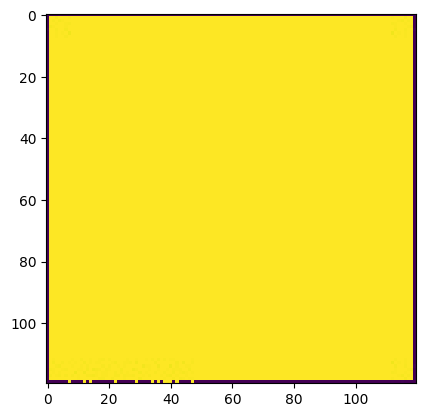

In [24]:
img = Image.open('data\\train\\12_NO-GESTURES\\0.jpg')
plt.imshow(img)

## 2.Training CNN model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical


### Building the CNN

In [26]:
# Building the CNN

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(12, activation='softmax'))

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\GESTURE_CONTROL\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compiling the CNN
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

### Preparing the train/test data and training the model

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=12,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=12,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 8399 images belonging to 12 classes.
Found 8374 images belonging to 12 classes.


In [29]:
history=model.fit(
        training_set,
        steps_per_epoch=250, # No of images in training set
        epochs=12,
        validation_data=test_set,
        validation_steps=100)# No of images in test set

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\GESTURE_CONTROL\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5681 - loss: 1.4180

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\GESTURE_CONTROL\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 224ms/step - accuracy: 0.5690 - loss: 1.4151 - val_accuracy: 0.9542 - val_loss: 0.1422
Epoch 2/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.9772 - loss: 0.0672 - val_accuracy: 0.9933 - val_loss: 0.0251
Epoch 3/12
200/250 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.9892 - loss: 0.0482

C:\Users\ajay2\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.9891 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 7.8262e-04
Epoch 4/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9938 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 2.3029e-04
Epoch 5/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 5.2359e-05
Epoch 6/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 1.0000 - loss: 4.8479e-04 - val_accuracy: 1.0000 - val_loss: 1.1718e-05
Epoch 7/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9974 - val_loss: 0.0053
Epoch 8/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.9946 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 5.6461e-05
Epoch 9/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 188ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9992 - val_loss: 0.0016
Epoch 10/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 1.

### Train accuracy

In [30]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

700/700 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.9764 - loss: 0.0721
Train accuracy: 97.90%


### Test accuracy

In [31]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

698/698 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9856 - loss: 0.0620
Test accuracy: 98.57%


### Save entire model to a HDF5 file

In [28]:
model.save('handrecognition_speech_model.hdf5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,901,414 (64.47 MB)

 Trainable params: 5,633,804 (21.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,267,610 (42.98 MB)

### Result Analysis

<Figure size 640x480 with 0 Axes>

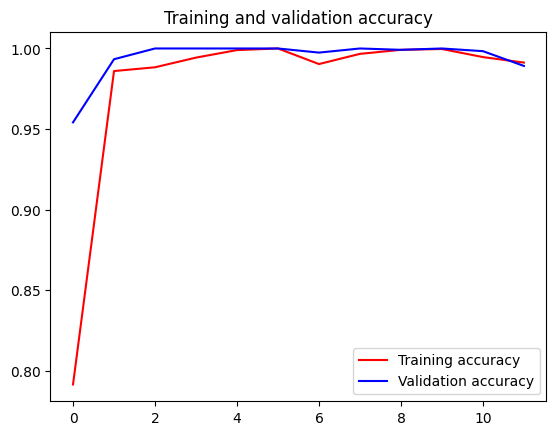

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

# Get history values from the training process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Find the minimum length of these lists
min_length = min(len(acc), len(val_acc), len(loss), len(val_loss))

# Slice each list to the same minimum length
acc = acc[:min_length]
val_acc = val_acc[:min_length]
loss = loss[:min_length]
val_loss = val_loss[:min_length]

epochs = range(min_length)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


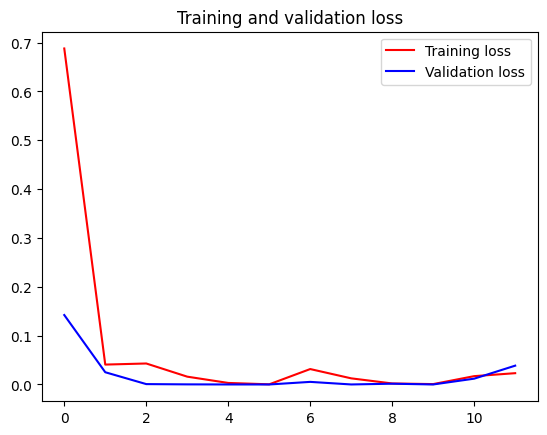

In [33]:

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


### Saving the model weights 

In [35]:
# Save the model architecture as a JSON file
model_json = model.to_json()
with open("gesture-speech-model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights('gesture-speech-model.weights.h5')  # Correct filename format for weights

## 3. Hand Gesture Prediction 

### Import Libraries

In [34]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import pyttsx3
import time

### Loading the model

In [35]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
json_file = open("gesture-speech-model.json", "r")
model_json = json_file.read()
json_file.close()

# Recreate the model from the JSON
loaded_model = model_from_json(model_json)

# Load weights into the model
loaded_model.load_weights("gesture-speech-model.weights.h5")  

print("Loaded model from disk")


Loaded model from disk


c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\GESTURE_CONTROL\.venv\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
final_label = ""
action=""

In [37]:
final_label = ""
action=""
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)


            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {
                'FINE': result[0][0],
                'WATER': result[0][1],
                'ENOUGH': result[0][2],
                'LIGHT-OFF': result[0][3],
                'LIGHT-ON': result[0][4],
                'FAN-OFF': result[0][5],
                'FAN-ON': result[0][6],
                'RESTROOM': result[0][7],
                'STOP': result[0][8],
                'THANK-YOU': result[0][9],
                'HELP': result[0][10],
                'NO-GESTURE': result[0][11]
            }

            # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if prediction[0][0] == 'FINE':
                final_label = 'FINE'
                action = "ALL GOOD"
            elif prediction[0][0] == 'WATER':
                final_label = 'WATER'
                action = "NEEDS WATER"
            elif prediction[0][0] == 'ENOUGH':
                final_label = 'ENOUGH'
                action = "ENOUGH/STOP"
            elif prediction[0][0] == 'LIGHT-OFF':
                final_label = 'LIGHT-OFF'
                action = "TURN LIGHT OFF"
                pyautogui.press('f5')  # Adjust with the correct key command if needed
            elif prediction[0][0] == 'LIGHT-ON':
                final_label = 'LIGHT-ON'
                action = "TURN LIGHT ON"
                pyautogui.press('f6')  # Adjust with the correct key command if needed
            elif prediction[0][0] == 'FAN-OFF':
                final_label = 'FAN-OFF'
                action = "TURN FAN OFF"
            elif prediction[0][0] == 'FAN-ON':
                final_label = 'FAN-ON'
                action = "TURN FAN ON"
            elif prediction[0][0] == 'RESTROOM':
                final_label = 'RESTROOM'
                action = "NEEDS RESTROOM"
            elif prediction[0][0] == 'STOP':
                final_label = 'STOP'
                action = "STOP ACTION"
            elif prediction[0][0] == 'THANK-YOU':
                final_label = 'THANK-YOU'
                action = "SHOW APPRECIATION"
            elif prediction[0][0] == 'HELP':
                final_label = 'HELP'
                action = "NEEDS HELP"
            elif prediction[0][0] == 'NO-GESTURE':
                final_label = 'NO-GESTURE'
                action = "NO ACTION"

            text1 = "Gesture: {}".format(final_label)
            text2 = "Action: {}".format(action)


            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [39]:
import cv2
import pyttsx3
import operator
import pyautogui
import time

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Variable to track last spoken action and time
last_action = None
last_speech_time = time.time()
action_detected_time = None  # To track when the action was first detected

# Set up camera and model as before
vid = cv2.VideoCapture(0)

# Load your trained model (replace with actual model loading code)
# loaded_model = load_your_model_function()

while vid.isOpened():
    ret, frame = vid.read()
    if ret:
        frame = cv2.flip(frame, 1)

        # Coordinates and ROI
        x1 = int(0.5 * frame.shape[1])
        y1 = 10
        x2 = frame.shape[1] - 10
        y2 = int(0.5 * frame.shape[1])

        cv2.rectangle(frame, (x1 - 1, y1 - 1), (x2 + 1, y2 + 1), (255, 0, 0), 3)
        roi = frame[y1:y2, x1:x2]
        roi = cv2.resize(roi, (120, 120))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
        cv2.imshow("Test Image", test_image)

        # Prediction code
        result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
        prediction = {
            'FINE': result[0][0],
            'WATER': result[0][1],
            'ENOUGH': result[0][2],
            'LIGHT-OFF': result[0][3],
            'LIGHT-ON': result[0][4],
            'FAN-OFF': result[0][5],
            'FAN-ON': result[0][6],
            'RESTROOM': result[0][7],
            'STOP': result[0][8],
            'THANK-YOU': result[0][9],
            'HELP': result[0][10],
            'NO-GESTURE': result[0][11]
        }

        prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

        # Action and speech output based on gesture
        if prediction[0][0] == 'FINE':
            final_label = 'FINE'
            action = "All good"
        elif prediction[0][0] == 'WATER':
            final_label = 'WATER'
            action = "Needs water"
        elif prediction[0][0] == 'ENOUGH':
            final_label = 'ENOUGH'
            action = "Enough, stop"
        elif prediction[0][0] == 'LIGHT-OFF':
            final_label = 'LIGHT-OFF'
            action = "Turn light off"
            pyautogui.press('f5')
        elif prediction[0][0] == 'LIGHT-ON':
            final_label = 'LIGHT-ON'
            action = "Turn light on"
            pyautogui.press('f6')
        elif prediction[0][0] == 'FAN-OFF':
            final_label = 'FAN-OFF'
            action = "Turn fan off"
        elif prediction[0][0] == 'FAN-ON':
            final_label = 'FAN-ON'
            action = "Turn fan on"
        elif prediction[0][0] == 'RESTROOM':
            final_label = 'RESTROOM'
            action = "Needs restroom"
        elif prediction[0][0] == 'STOP':
            final_label = 'STOP'
            action = "Stop action"
        elif prediction[0][0] == 'THANK-YOU':
            final_label = 'THANK-YOU'
            action = "Thank you"
        elif prediction[0][0] == 'HELP':
            final_label = 'HELP'
            action = "Needs help"
        elif prediction[0][0] == 'NO-GESTURE':
            final_label = 'NO-GESTURE'
            action = "No action"

        text1 = "Gesture: {}".format(final_label)
        text2 = "Action: {}".format(action)

        # Display text on screen
        cv2.putText(frame, text1, (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)
        cv2.putText(frame, text2, (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)
        cv2.imshow("Hand Gesture Recognition", frame)

        # Update action detection time if the action is not 'NO-GESTURE'
        if prediction[0][0] != 'NO-GESTURE':
            if action_detected_time is None:
                action_detected_time = time.time()  # Set detection time

            # Convert action to speech if new or enough time has passed (2 seconds delay)
            if action != last_action or (time.time() - last_speech_time) > 2:
                # Check if the action has been detected for more than 1 second
                if (time.time() - action_detected_time) > 2:
                    engine.say(action)
                    engine.runAndWait()
                    last_action = action
                    last_speech_time = time.time()
                    action_detected_time = None  # Reset the detection time after speaking
        else:
            # Reset action detection time if no gesture is detected
            action_detected_time = None

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


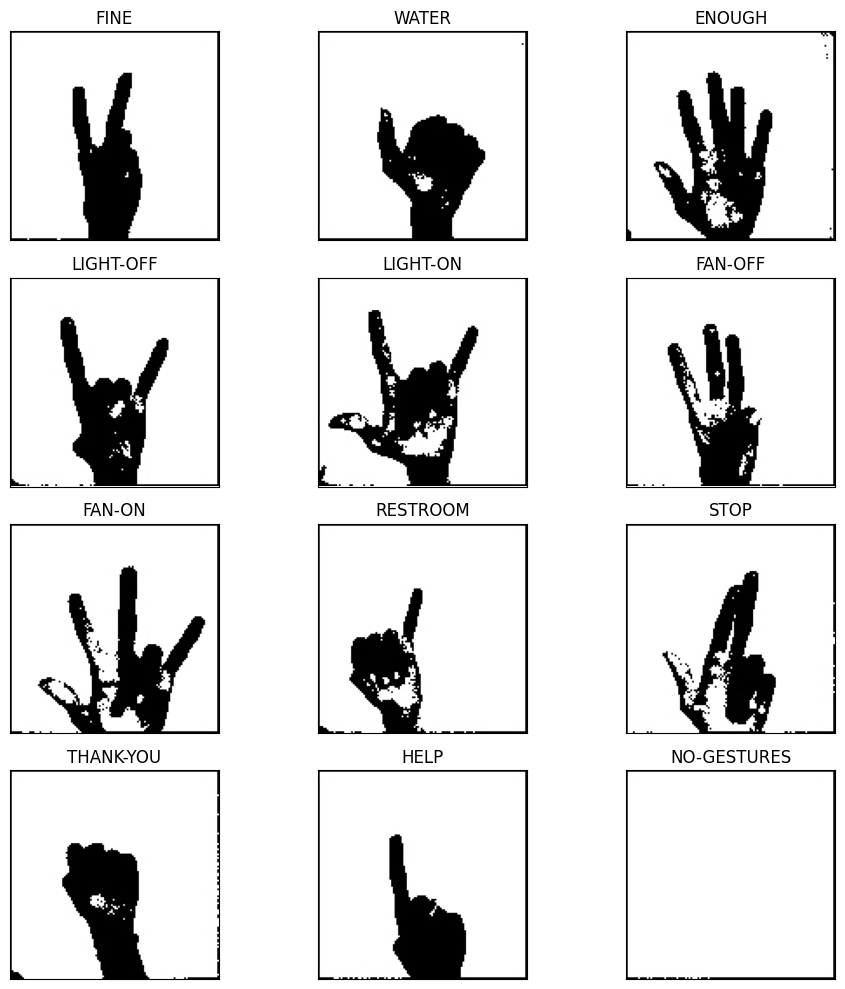

# Result Analysis

In [40]:
CATEGORIES = ['01_FINE',
 '02_WATER',
 '03_ENOUGH',
 '04_LIGHT-OFF',
 '05_LIGHT-ON',
 '06_FAN-OFF',
 '07_FAN-ON',
 '08_RESTROOM',
 '09_STOP',
 '10_THANK-YOU',
 '11_HELP',
 '12_NO-GESTURES']

IMG_SIZE = 120

# paths for dataset
data_path = "data/train"

In [41]:
# Initialize the list to store images and their labels
image_data = []

# Loop through each category to load images
for category in CATEGORIES:
    # Get the class index from the CATEGORIES list
    class_index = CATEGORIES.index(category)
    print("Class index:", class_index)
    
    # Construct the path for the current category
    path = os.path.join(data_path, category)
    print("Loading from path:", path)
    
    # Ensure the path exists to avoid errors
    if os.path.exists(path):
        # Loop through each image in the category folder
        for img in os.listdir(path):
            try:
                # Read the image in grayscale mode
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resize the image and append it to image_data along with its class index
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
                
            except Exception as e:
                print(f"Could not load image {img}: {e}")
    else:
        print(f"Directory {path} does not exist.")

# Check the loaded image data length to ensure images were added
print(f"Total images loaded: {len(image_data)}")


Class index: 0
Loading from path: data/train\01_FINE
Class index: 1
Loading from path: data/train\02_WATER
Class index: 2
Loading from path: data/train\03_ENOUGH
Class index: 3
Loading from path: data/train\04_LIGHT-OFF
Class index: 4
Loading from path: data/train\05_LIGHT-ON
Class index: 5
Loading from path: data/train\06_FAN-OFF
Class index: 6
Loading from path: data/train\07_FAN-ON
Class index: 7
Loading from path: data/train\08_RESTROOM
Class index: 8
Loading from path: data/train\09_STOP
Class index: 9
Loading from path: data/train\10_THANK-YOU
Class index: 10
Loading from path: data/train\11_HELP
Class index: 11
Loading from path: data/train\12_NO-GESTURES
Total images loaded: 8399


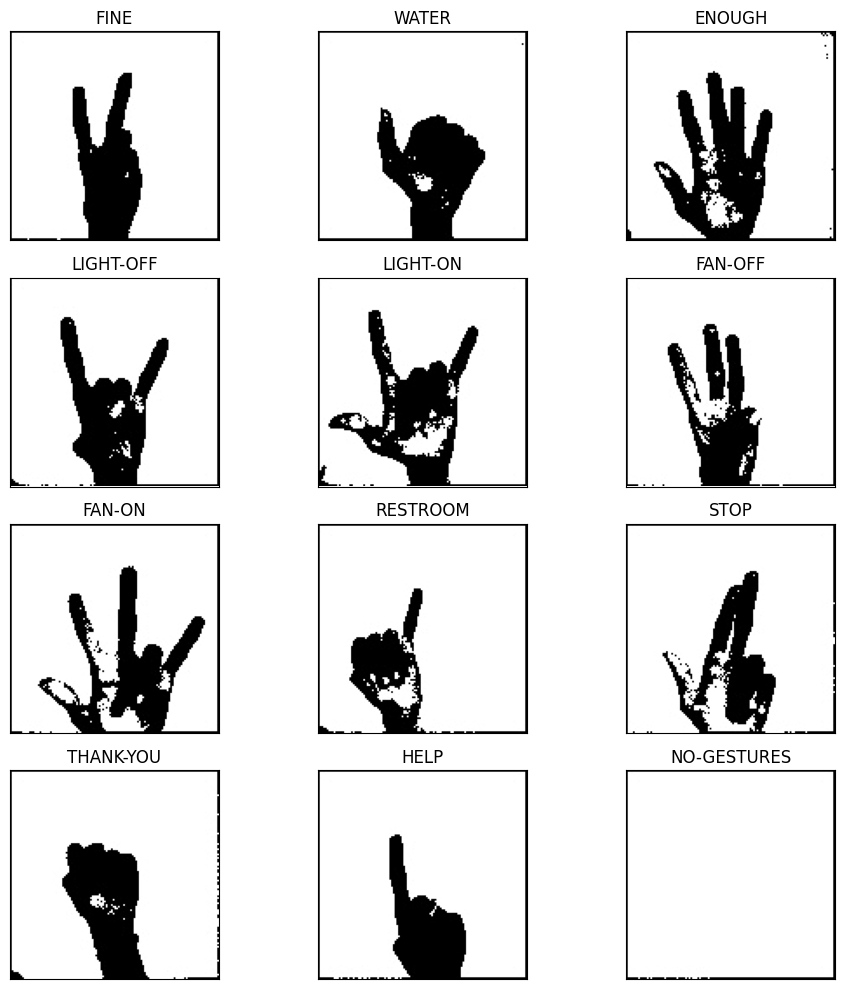

<Figure size 640x480 with 0 Axes>

In [42]:

category_images = {}

for img, label in image_data:
    if label not in category_images:
        category_images[label] = img
    if len(category_images) == len(CATEGORIES):
        break

plt.figure(figsize=(10, 10))
for i, (label, img) in enumerate(category_images.items()):
    plt.subplot(4, 3, i + 1) 
    plt.imshow(img, cmap='gray')  # Display in grayscale
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label][3:])  # Show category label without prefix

plt.tight_layout()
plt.show()
# Save the figure before showing it
plt.savefig("Gestures.png")  # Save the figure as "Gestures.png"
plt.show() 

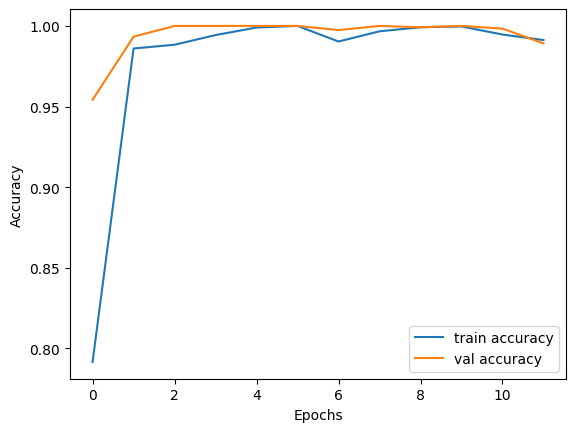

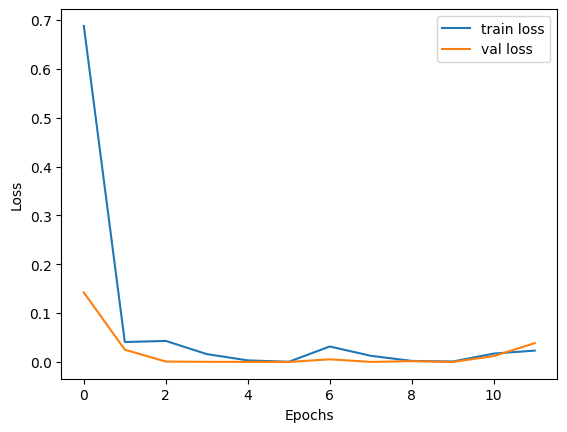

In [43]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
# shuffle the input data
import random
random.shuffle(image_data)

In [45]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [46]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(8399, 120, 120)

In [47]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
label = to_categorical(label, num_classes=12)
print(label[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [48]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [49]:
input_data.shape

(8399, 120, 120, 1)

In [50]:

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step


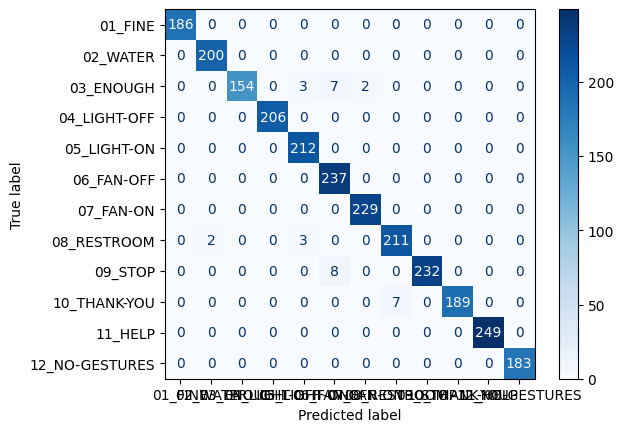

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sn

# Get predictions and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
disp.plot(cmap='Blues')
plt.show()


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=CATEGORIES))


                precision    recall  f1-score   support

       01_FINE       1.00      1.00      1.00       186
      02_WATER       0.99      1.00      1.00       200
     03_ENOUGH       1.00      0.93      0.96       166
  04_LIGHT-OFF       1.00      1.00      1.00       206
   05_LIGHT-ON       0.97      1.00      0.99       212
    06_FAN-OFF       0.94      1.00      0.97       237
     07_FAN-ON       0.99      1.00      1.00       229
   08_RESTROOM       0.97      0.98      0.97       216
       09_STOP       1.00      0.97      0.98       240
  10_THANK-YOU       1.00      0.96      0.98       196
       11_HELP       1.00      1.00      1.00       249
12_NO-GESTURES       1.00      1.00      1.00       183

      accuracy                           0.99      2520
     macro avg       0.99      0.99      0.99      2520
  weighted avg       0.99      0.99      0.99      2520



In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming CATEGORIES has the class names
y_test_binarized = label_binarize(y_true, classes=range(len(CATEGORIES)))

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(CATEGORIES)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step


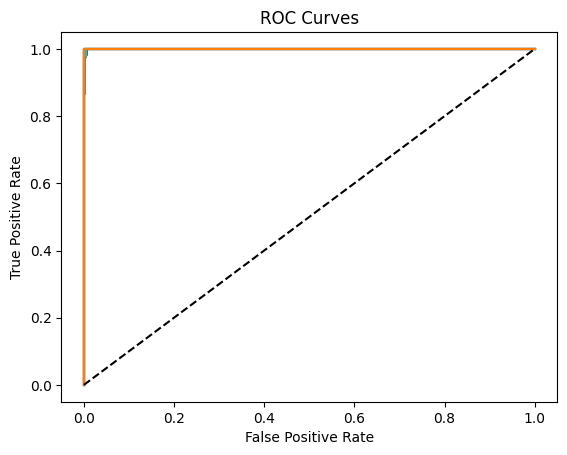

In [54]:

# Plot ROC curves
plt.figure()
for i, category in enumerate(CATEGORIES):
    plt.plot(fpr[i], tpr[i], label=f'{category} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.show()
